In [7]:
def is_prime(num):
    if num > 1:
        for i in range(2,num//2):
            if (num % i) == 0:
                return False
                break
        else:
            return True

In [8]:
is_prime(100)

False

In [9]:
def Norm(comp):
    return int(comp.real**2 + comp.imag**2)

In [10]:
Norm(10+1j)

101

In [11]:
def is_gaussian_prime(comp):
    return is_prime(Norm(comp))

In [12]:
is_gaussian_prime(-7-2j)

True

In [13]:
import math

def complex_eps(c): 
    return complex(round(c.real, 6), round(c.imag, 6))

def floor(c): 
    real = math.floor(round(c.real, 6))
    imag = math.floor(round(c.imag, 6))
    return complex(real, imag)

def complex_modulus(a, b): 
    return a - (b * floor(a / b))

def gaussian_gcd(a, b): 
    while b != 0+0j: 
        a, b = b, complex_modulus(a, b)
    return a

def modular_exponentiation(base, exponent, modulus):
    result = 1
    while exponent > 0:
        if (int(exponent) & 1) == 1: 
            result = (result * base) % modulus
        exponent=int(exponent)
        exponent >>= 1
        base = (base ** 2) % modulus
    return result

def root4(p): 
   # 4th root of 1 modulo p
   # Derived from http://bit.ly/p4ESdk by Robin Chapman
    base = 2
    pow = p/4
    while True:
        a = modular_exponentiation(base, pow, p)
        modulus = (a ** 2) % p
        if modulus == (p - 1): return a
        base += 1

def sq2(p): 
    a = root4(p) # 4th root of 1 modulo p
    return gaussian_gcd(complex(p, 0), complex(a, 1))

def first_quadrant_associate(c): 
    if c.real >= 0: 
        if c.imag >= 0: return c # 1st quadrant
        return c * 1j # 2nd quadrant
    elif c.imag < 0: return -c # 3rd quadrant
    return c * -1j # 4th quadrant

def factor(n): 
    if n < 2: return []

    if not (n & 1): # faster than n % 2
        res = factor(n // 2)
        return [2] + res

    for i in range(3, int(n ** .5) + 1, 2): 
        if not (n % i): 
            res = factor(n // i)
            return [i] + res
    return [n]

def norm(G): 
    return int(G.real ** 2) + int(G.imag ** 2)

def factor_gaussian(G): 
  # Algorithm from http://bit.ly/pCn9Hm by Jim Lewis
    N = norm(G)
    primes = factor(N)
    if primes == [1]: 
        return [G], 1

    factors = []
    while primes: 
        p = primes[0]

        if p == 2: 
            u = 1 + 1j
            if not complex_modulus(G, u): q = u
            else: q = 1 - 1j
            primes.remove(p)
        elif (p % 4) == 3: 
            q = p
            primes.remove(p)
            primes.remove(p)
        else: 
            u = sq2(p)
            u = first_quadrant_associate(u) # u[0] + (u[1] * 1j))
            if not complex_modulus(G, u): q = u
            else: q = u.conjugate()
            primes.remove(p)

        factors.append(q)
        G = complex_eps(G/q)
    return factors, G

def product(numbers): 
    result = 1
    for number in numbers: 
        result = result * number
    return result

def divisor_cardinality(factors): 
    powers = []
    unique_factors = set(factors)
    for unique_factor in unique_factors: 
        power = factors.count(unique_factor)
    powers.append(power)
    return product(power + 1 for power in powers)

In [14]:
def fact_com(num):    
    fac=factor_gaussian(num)[0]+[factor_gaussian(num)[1]]
    return fac

In [15]:
def sum_norm(c):
    l=fact_com(c)
    n=0
    for i in l:
        n=n+Norm(i)
    return n
    

In [16]:
sum_norm(200)

33

In [21]:
fact_com(10)

[(1+1j), (1+1j), (2+1j), (2-1j), -1j]

In [63]:
import math
def vector_gaussian(n):
    g = fact_com(n)
    import matplotlib.pyplot as plt
    fig= plt.figure(figsize=(7,7))
    G = sum(g)
    u = [i.real for i in g]
    v = [i.imag for i in g]
    x = [0 for i in range(len(g))]
    y = [0 for i in range(len(g))]
    if int(math.sqrt(Norm(n)))>=int(math.sqrt(Norm(G))):
        d = int(math.sqrt(Norm(n)))
    else:
        d = int(math.sqrt(Norm(G)))
    plt.gca(xlim=[d*(-1),d],ylim=[d*(-1),d])
    plt.scatter(n.real,n.imag)
    plt.quiver(x,y,u,v,angles='xy',scale_units='xy',scale=1)
    plt.quiver(0,0,G.real,G.imag,angles='xy',scale_units='xy',scale=1,color="r")
    plt.grid(True)
    plt.show()
    print(g,G)

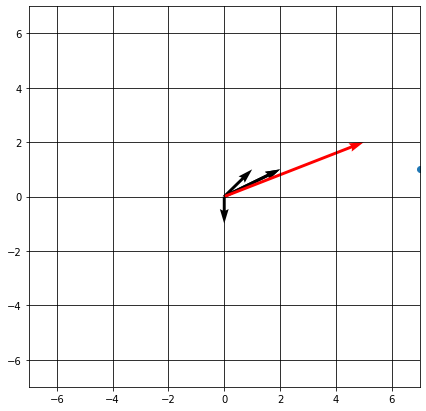

[(1+1j), (2+1j), (2+1j), -1j] (5+2j)


In [66]:
vector_gaussian(7+1j)

In [67]:
from ipywidgets import interact, widgets

In [71]:
interact(vector_gaussian, n=(0,10,1));

interactive(children=(IntSlider(value=5, description='n', max=10), Output()), _dom_classes=('widget-interact',…